<a href="https://colab.research.google.com/github/arakurinope/arakurinope_projectPortfolio/blob/main/Trimmed_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries and checking dataset**

**importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from tqdm.notebook import tqdm
import os
import pickle
from sklearn.model_selection import train_test_split
import pdb
import datetime
from scipy.stats import pearsonr
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, log_loss, plot_roc_curve, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib
from prettytable import PrettyTable
from pprint import pprint

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
_ = np.seterr(over='ignore')

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('drive/My Drive/BitcoinHeistData.csv')
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [ ]:
#Converting multi-class classification of label to binary classification

labels = np.array([])
for label_i in tqdm(df['label']):
    if label_i == 'white':
        labels = np.append(labels, 0) #not ransomware
    else:
        #all non-white (i.e. families of ransomware) will be binned under one class
        labels = np.append(labels, 1) #ransomware

  0%|          | 0/2916697 [00:00<?, ?it/s]

In [ ]:
#spliiting into test and train
#i used stratify so as to have equal number of positive class in both taining and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['label'], axis=1), 
    labels,
    stratify = labels, #so as to have equal number of positive class in both training and testing
    random_state = 42,
    test_size = 0.2
)

#storing the stock dataframes for later use
X_train_stock = X_train.copy()
X_test_stock = X_test.copy()

In [ ]:
for i in list(df.columns):
    if any(df[i].isnull()):
        print('Column: {} contains NaN'.format(i))
else:
    print('No NaN found...')

No NaN found...


In [ ]:
data = data.drop_duplicates()

# **Checking the distributions of all features**

looking at the distrbution of the predictor columns so as to enable us fix any skewed distribution

## Address

In [ ]:
X_train['address'].value_counts()

1LXrSb67EaH1LGc6d6kWHq8rgv4ZBQAcpU    348
16cVG72goMe4sNqZhnpmnqfCMZ1uSFbUit    206
12wQZTDmA8onM3sEt4jwcvzDxnNXxD8Vza    174
12YursV58dRT2c9iuZg3jEWfwgTDamBcnd    147
1CVWpTNwNYGdKgZRohiiVFrnFNbw8anG9     147
                                     ... 
13MMpNJmmovDhRAtfVdpBKsnKn3kGPjsaz      1
1DZcvuAgXwqCdzcRSMe7ZieTfsJhnuHKYW      1
1B1Y4XXeEoqv6EgE6KvQ8MDpdsRhj3mSE4      1
13uv3w3XNXuoxJVU5UrLCMN3WM5DDqw6FB      1
1LUzBd2PRC5TSF9VTqPpcCmY3LJNCfXkEB      1
Name: address, Length: 2121750, dtype: int64

In [ ]:
n_addresses = list(X_train['address'].value_counts())

In [ ]:
print('An address is repeated an average of {} number of times'.format(np.mean(n_addresses)))

An address is repeated an average of 1.0997322964533993 number of times


In [ ]:
n_addresses = np.sort(np.array(n_addresses))

#Priting percentiles because n_addresses is very skewed
for i in [50, 75, 90, 95, 99, 100]:
    print('{}\'th percentile: {}'.format(i, np.percentile(n_addresses, i)))

50'th percentile: 1.0
75'th percentile: 1.0
90'th percentile: 1.0
95'th percentile: 1.0
99'th percentile: 3.0
100'th percentile: 348.0


In [ ]:
for i in np.arange(99, 99.9, 0.1):
    print('{}\'th percentile: {}'.format(i, np.percentile(n_addresses, i)))

99.0'th percentile: 3.0
99.1'th percentile: 4.0
99.19999999999999'th percentile: 4.0
99.29999999999998'th percentile: 4.0
99.39999999999998'th percentile: 5.0
99.49999999999997'th percentile: 5.0
99.59999999999997'th percentile: 6.0
99.69999999999996'th percentile: 7.0
99.79999999999995'th percentile: 10.0
99.89999999999995'th percentile: 15.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


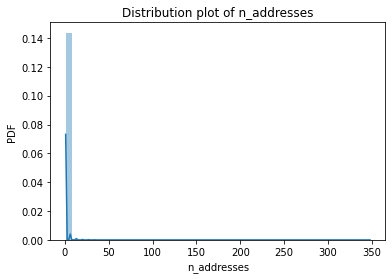

In [ ]:
#plot to print distribution of n_addresses

plt.title('Distribution plot of n_addresses')
sns.distplot(n_addresses)
plt.xlabel('n_addresses')
plt.ylabel('PDF')
plt.show()

Trying to fix skewness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


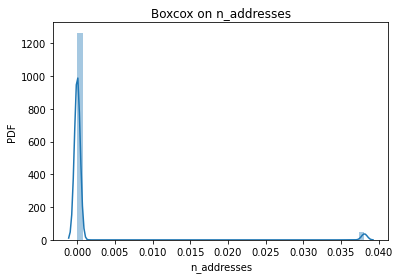

In [ ]:
#trying boxcox to fix skewness

plt.title('Boxcox on n_addresses')
sns.distplot(boxcox(n_addresses)[0])
plt.xlabel('n_addresses')
plt.ylabel('PDF')
plt.show()

In [ ]:
dict_n_address = dict(X_train['address'].value_counts())
#dict_n_address contains a dictionary of addresses and the number of times they appear in training set


n_address = boxcox(np.array(list(dict_n_address.values())))[0]
#Applying boxcox over all the number of times each address apears

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


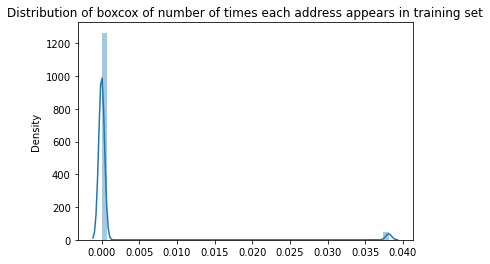

In [ ]:
sns.distplot(n_address)
plt.title('Distribution of boxcox of number of times each address appears in training set')
plt.show()

In [ ]:
for index, key in tqdm(enumerate(dict_n_address.keys())):
    #We are updating the dictionary with number of times each address appears with
    #the boxcox transformation applied to fix the skewness
    updated = {key: n_address[index]}
    dict_n_address.update(updated)

0it [00:00, ?it/s]

In [ ]:
pd.Series(list(dict_n_address.values())).value_counts()

0.000000    2046548
0.038124      43000
0.038124      19373
0.038124      12829
dtype: int64

### Constructing new feature: n_address_feature

The feature contains the number of times the address has been seen in the training set (boxcox transformation applied)

In [ ]:
n_address_feature_train = np.array([])

for index, row in tqdm(X_train.iterrows(), total=X_train.shape[0]):
    #We are getting a list of the new values
    #For each address in the training set we are appending its corresponding boxcox'd
    #number of times its appeared in training set

    n_address_i = dict_n_address.get(X_train.loc[index]['address']) 
    n_address_feature_train = np.append(n_address_feature_train, n_address_i)

  0%|          | 0/2333357 [00:00<?, ?it/s]

In [ ]:
n_address_feature_test = np.array([])
min_dict_n_address = min(list(dict_n_address.values()))

for index, row in tqdm(X_test.iterrows(), total=X_test.shape[0]):
    try:
        #we do the same as above

        n_address_i = dict_n_address[X_test.loc[index]['address']]
    except KeyError:
        n_address_i = min_dict_n_address #Addressing cold start
    n_address_feature_test = np.append(n_address_feature_test, n_address_i)

  0%|          | 0/583340 [00:00<?, ?it/s]

## Day

Looking at its distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


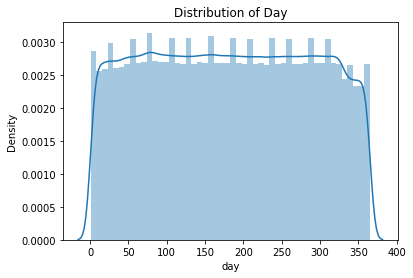

In [ ]:
sns.distplot(X_train['day'])
plt.title('Distribution of Day')
plt.show()

## Length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

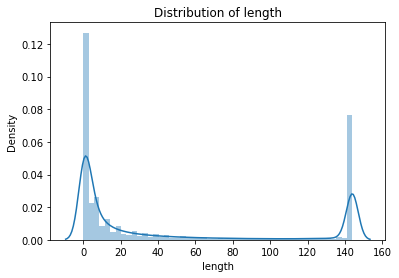

In [ ]:
sns.distplot(X_train['length'])
plt.title('Distribution of length')
plt.plot()

**Constructing new feature: gaussian_length**

Feature tries to fix the skewness of the length variable. This is done by applying complex functions over the length feature and then performing a boxcox operation on it

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


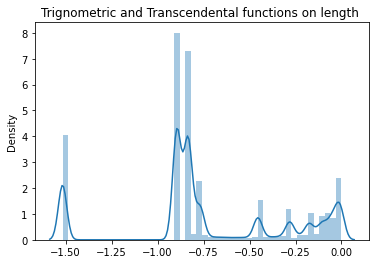

In [ ]:
sns.distplot(boxcox((np.sin(np.log(np.sqrt(np.array(X_train['length']) + 1e-6)))) ** 2)[0])
plt.title('Trignometric and Transcendental functions on length ')
plt.show()

These transformations make the distribution more gaussian and thus, will help during modelling

In [ ]:
#constructing the feature

gaussian_length_train = boxcox((np.sin(np.log(np.sqrt(np.array(X_train['length']) + 1e-6)))) ** 2)[0]
gaussian_length_test = boxcox((np.sin(np.log(np.sqrt(np.array(X_test['length']) + 1e-6)))) ** 2)[0]

## Weight

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


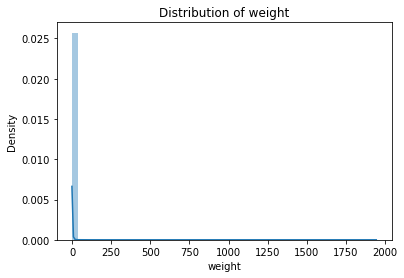

In [ ]:
sns.distplot(X_train['weight'])
plt.title('Distribution of weight')
plt.show()

Weight is also an extremely skewed-feature, thus we will try to fix the skewness

**Constructing new feature: gaussian_weight**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


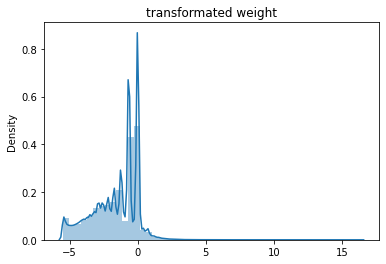

In [ ]:
sns.distplot(boxcox(np.array(X_train['weight']))[0])
plt.title('transformated weight')
plt.show()

Box-cox transformation over weight gives us a much more normal distribution

In [ ]:
#Apply boxcox transform on weight
gaussian_weight_train = np.array(boxcox(np.array(X_train['weight']))[0])
#for test set as well
gaussian_weight_test = np.array(boxcox(np.array(X_test['weight']))[0])

## Count

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


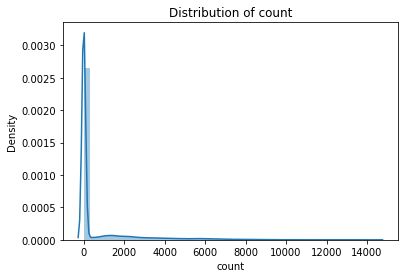

In [ ]:
sns.distplot(X_train['count'])
plt.title('Distribution of count')
plt.show()

Again, we see an extremely-skewed log-normal distribution for the Count feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


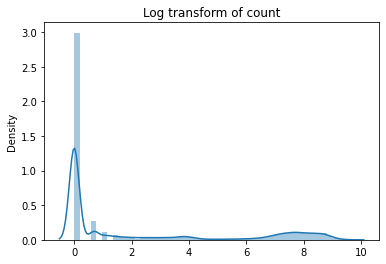

In [ ]:
sns.distplot(np.log(np.array(X_train['count']) + 1e-6))
plt.title('Log transform of count')
plt.show()

In [ ]:
#apply log-transform on training

log_count_train = np.log(np.array(X_train['count']) + 1e-6)

#log transform for test

log_count_test = np.log(np.array(X_test['count']) + 1e-6)


## Looped

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


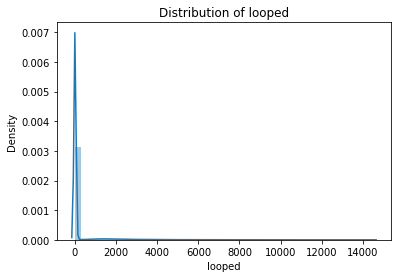

In [ ]:
sns.distplot(X_train['looped'])
plt.title('Distribution of looped')
plt.show()

**Performing sigmoid operation to fix skewedness**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


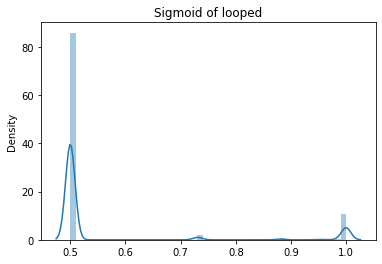

In [ ]:
def sigmoid(x):
    #returns the logistic function of x
    
    return 1 / (1 + np.exp(-x))

sns.distplot(sigmoid(np.array(X_train['looped'])))
plt.title('Sigmoid of looped')
plt.show()

In [ ]:
#Applying logistic function on each element of looped

sigmoid_looped_train = sigmoid(np.array(X_train['looped']))
#Same for test

sigmoid_looped_test = sigmoid(np.array(X_test['looped']))

## Neighbors

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


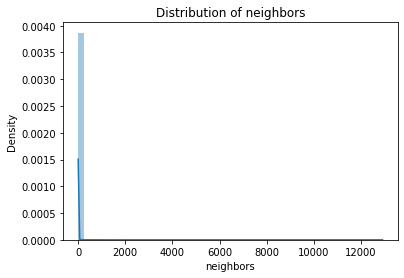

In [ ]:
sns.distplot(X_train['neighbors'])
plt.title('Distribution of neighbors')
plt.show()

**Constructing a new feature: gaussian_neighbors**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


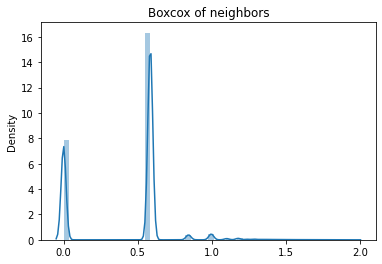

In [ ]:
sns.distplot(boxcox(np.array(X_train['neighbors']) + 1e-6)[0])
plt.title('Boxcox of neighbors')
plt.show()

Boxcox transformation over Neighbors gives us a slighly more gaussian distribution

In [ ]:
#Applying boxcox transform for neighbors

gaussian_neighbors_train = boxcox(np.array(X_train['neighbors']) + 1e-6)[0]
#Same for test

gaussian_neighbors_test = boxcox(np.array(X_test['neighbors']) + 1e-6)[0]

## Income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


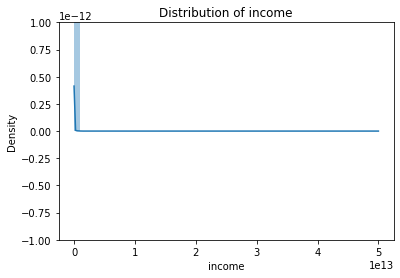

In [ ]:
sns.distplot(X_train['income'])
plt.title('Distribution of income')
plt.show()

**Constructing new feature: gaussian_income**

Feature tries to account for the extreme skewedness of income by applying boxcox transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


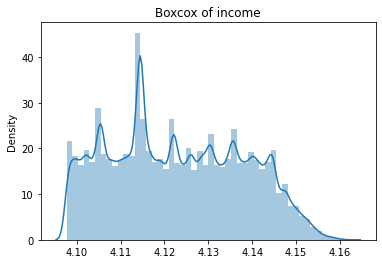

In [ ]:
sns.distplot(boxcox(np.array(X_train['income']) + 1e-6)[0])
plt.title('Boxcox of income')
plt.show()

In [ ]:
#Applying boxcox on income

gaussian_income_train = boxcox(np.array(X_train['income']) + 1e-6)[0]
gaussian_income_test = boxcox(np.array(X_test['income']) + 1e-6)[0]


# **Creating new features**

In [ ]:
X_train.head()

,address,year,day,length,weight,count,looped,neighbors,income,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped
2264511,366ZrW8BbPeK21L7bwTJkzKqEfKJceJpKm,2017,43,0,0.500000,1,0,2,31515644.0,0.0,4.098487,5.841690e-01,-0.651137,-0.895193,9.999995e-07,0.5
1289376,1Nyy3jRxjmt9dCWPe5LvnSZhArnSfjAykR,2014,163,4,0.040000,1,0,2,100000000.0,0.0,4.114446,5.841690e-01,-2.434900,-0.769382,9.999995e-07,0.5
1046802,1B9zENZjbkFxwdjHSmAyqXrPq5FLb9vDmZ,2013,286,2,0.500000,1,0,1,81050000.0,0.0,4.111862,9.999992e-07,-0.651137,-1.517133,9.999995e-07,0.5
2335966,35hfQ92WkncKrupG9NVtSmScvKXXkBfnPD,2017,115,92,1.016858,72,0,2,100030000.0,0.0,4.114450,5.841690e-01,0.016743,-0.475286,4.276666e+00,0.5
1214724,1Bmm4KkZuzdzEjKtVmtTVyQoVKEE1J4wmz,2014,89,144,0.028767,1189,1187,4,184953990.0,0.0,4.121303,9.948198e-01,-2.612813,-0.835022,7.080868e+00,1.0


**Loading all features into a dataframe**

Adding features to original dataframe

In [ ]:
#training

#Adding the features

X_train['n_address'] = n_address_feature_train #1
X_train['gaussian_income'] = gaussian_income_train #2
X_train['gaussian_neighbors'] = gaussian_neighbors_train #3
X_train['gaussian_weight'] = gaussian_weight_train #4
X_train['gaussian_length'] = gaussian_length_train #5
X_train['log_count'] = log_count_train #6
X_train['sigmoid_looped'] = sigmoid_looped_train #7

In [ ]:
#testing

#Adding the features

X_test['n_address'] = n_address_feature_test #1
X_test['gaussian_income'] = gaussian_income_test #2
X_test['gaussian_neighbors'] = gaussian_neighbors_test #3
X_test['gaussian_weight'] = gaussian_weight_test #4
X_test['gaussian_length'] = gaussian_length_test #5
X_test['log_count'] = log_count_test #6
X_test['sigmoid_looped'] = sigmoid_looped_test #7

# **Fine Tuning and Scaling dataset for the modelling**

**Making data ready for modelling**

Distance based models

In [ ]:
#Scale the data

col_names_standardize = [
    'year',
    'day',
    'length',
    'weight',
    'count',
    'looped',
    'neighbors',
    'income',
    'n_address',
    'gaussian_income',
    'gaussian_neighbors',
    'gaussian_weight',
    'gaussian_length',
    'log_count',
    'sigmoid_looped'
]

transformer = ColumnTransformer([
    ('standardize', StandardScaler(), col_names_standardize)
], remainder = 'passthrough')

transformer.fit(X_train.drop(['address'], axis=1))

X_train_distance = transformer.transform(X_train.drop(['address'], axis=1))
X_test_distance = transformer.transform(X_test.drop(['address'], axis=1))

In [ ]:
pd.DataFrame(X_train_distance).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.118440,-1.331324,-0.763299,-0.012475,-0.426614,-0.246761,-0.011472,-0.027877,-0.374357,-1.630327,0.490384,0.566008,-0.407699,-0.685938,-0.395178
1,-0.210551,-0.177655,-0.695495,-0.134889,-0.426614,-0.246761,-0.011472,-0.027444,-0.374357,-0.565675,0.490384,-0.505993,-0.118033,-0.685938,-0.395178
2,-0.653547,1.004857,-0.729397,-0.012475,-0.426614,-0.246761,-0.067468,-0.027564,-0.374357,-0.738092,-1.382499,0.566008,-1.839650,-0.685938,-0.395178
3,1.118440,-0.639122,0.796201,0.125070,-0.384628,-0.246761,-0.011472,-0.027444,-0.374357,-0.565435,0.490384,0.967388,0.559093,0.638162,-0.395178
4,-0.210551,-0.889084,1.677657,-0.137879,0.275925,0.981263,0.100520,-0.026906,-0.374357,-0.108267,1.806958,-0.612914,-0.269160,1.506372,2.693061


In [ ]:
if input('Save training and testing along with labels?') == 'y':
    with open('13_2_DIST_X_train_y_train_X_test_y_test.pickle', 'wb') as save_file:
        pickle.dump([X_train_distance, y_train, X_test_distance, y_test], save_file)

Save training and testing along with labels?'drive/My Drive/Colab Notebooks'


### Tree Based Models

In [ ]:
X_train_tree, X_test_tree = X_train.drop(['address'], axis=1).to_numpy(), X_test.drop(['address'], axis=1).to_numpy()

In [ ]:
pd.DataFrame(X_train_tree).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2017.0,43.0,0.0,0.500000,1.0,0.0,2.0,31515644.0,0.0,4.098487,5.841690e-01,-0.651137,-0.895193,9.999995e-07,0.5
1,2014.0,163.0,4.0,0.040000,1.0,0.0,2.0,100000000.0,0.0,4.114446,5.841690e-01,-2.434900,-0.769382,9.999995e-07,0.5
2,2013.0,286.0,2.0,0.500000,1.0,0.0,1.0,81050000.0,0.0,4.111862,9.999992e-07,-0.651137,-1.517133,9.999995e-07,0.5
3,2017.0,115.0,92.0,1.016858,72.0,0.0,2.0,100030000.0,0.0,4.114450,5.841690e-01,0.016743,-0.475286,4.276666e+00,0.5
4,2014.0,89.0,144.0,0.028767,1189.0,1187.0,4.0,184953990.0,0.0,4.121303,9.948198e-01,-2.612813,-0.835022,7.080868e+00,1.0


# **Uni-variate analysis**

*   Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable
*   In this section we will look at our features' Probabiliy Density Function (PDF) which gives us the relative likelihood of a random variable taking a value in a specific range.
*   Ideally these PDF's should be normally distributed, meaning they should look like a bell curve because some of our models have naive assumptions of the data-set they operate on.
*   For this reason, if they are not normally distributed, we will modify them by applying transformation functions to better suit our needs
We will also plot PDF's of features whose datapoints belong to class 0 and 1 separately. This will help us see if there is any difference in the PDF's. If there is, our models perform better.





In [ ]:
print('Percentage of positive class data-points: {}%'.format((sum(y_train)/(len(y_train)) * 100)))

Percentage of positive class data-points: 1.4198427415950496%


Since there is a high imbalance in our data, lets undersample datapoints from negative class for the rest of the anaylsis.

In [ ]:
#Undersampling negative class

undersampled_df = pd.DataFrame([], columns = X_train.columns)
index = 0

for index_df, row in tqdm(X_train.iterrows()):
    if y_train[index] == 1:
        #skip if positive class
        index += 1
        continue

    if np.random.uniform(0, 1) <= 0.015:
        #We are getting data-points with a probability of 1.5%
        undersampled_df = undersampled_df.append(row, ignore_index=True)
    index += 1

0it [00:00, ?it/s]

In [ ]:
#taking a sub-df of all the positive class datapoints for comparison

positive_df = pd.DataFrame([], columns = X_train.columns)
index = 0

for index_df, row in tqdm(X_train.iterrows()):
    if y_train[index] == 0:
        index += 1
        continue

    positive_df = positive_df.append(row, ignore_index=True)
    index += 1

0it [00:00, ?it/s]

In [ ]:
undersampled_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped
0,1PXxTqSg7BpEaSNJBDbd4h3edGXdihzWb4,2016,273,0,1.000000e+00,1,0,1,4.385768e+07,0.0,4.103515,9.999992e-07,0.000000,-0.895193,9.999995e-07,0.5
1,19HH3qsDSgnnBMDzpGBYeEgzmeGSFJTzqz,2018,37,0,1.000000e+00,1,0,2,3.337000e+07,0.0,4.099386,5.841690e-01,0.000000,-0.895193,9.999995e-07,0.5
2,1My7eCS3PbLQhXpJ6LUHoeTQfYw9tRoxFr,2018,223,6,5.000000e-01,1,0,1,8.501527e+07,0.0,4.112461,9.999992e-07,-0.651137,-0.454608,9.999995e-07,0.5
3,13JAqf9kUmpZTzdCTbbGhkMo6WBLp5AcvF,2011,141,96,2.724540e+01,126,72,2,5.000000e+12,0.0,4.160676,5.841690e-01,4.534708,-0.505052,4.836282e+00,1.0
4,19nmYVkDDb43QJ2qfxuh6QDiX4RLJX4Foq,2013,357,142,9.485218e-09,48,48,2,3.000000e+07,0.0,4.097702,5.841690e-01,-5.295825,-0.822214,3.871201e+00,1.0


## n_address
*   Feature indicates the number of times addresss has appeared in training data.
*   Now let us look at its distribution and how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


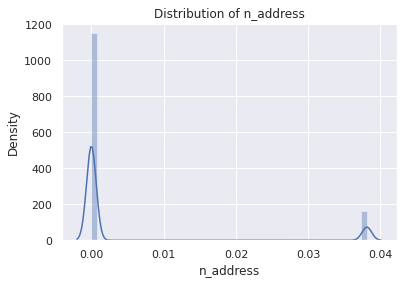

In [ ]:
#Distribution of n_address

sns.set_theme('notebook')
sns.distplot(X_train['n_address'])
plt.title('Distribution of n_address')
plt.show()

**White vs Ransomware**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


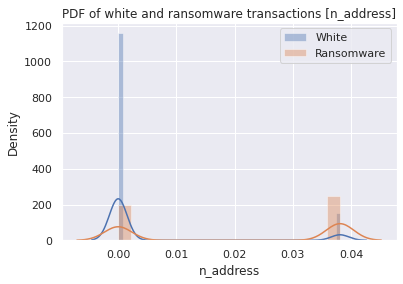

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['n_address'], label = 'White')
sns.distplot(positive_df['n_address'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [n_address]')
plt.show()

We notice that there is quite a lot of separability between the two-classes in their respective PDFs

## Year
*   Feature indicates what year the transaction had taken place in.
*   Now let us look at its distribution and how it affects the target variable.

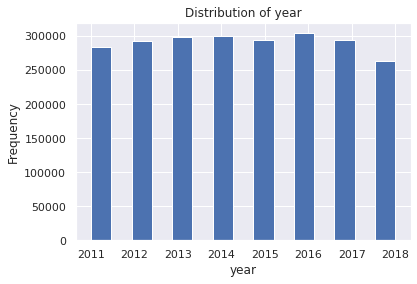

In [ ]:
#Displaying histogram of year feature

X_train['year'].plot(kind = 'hist', bins=15)
plt.xlabel('year')
plt.title('Distribution of year')
plt.show()

**PDF of white vs ransomware**

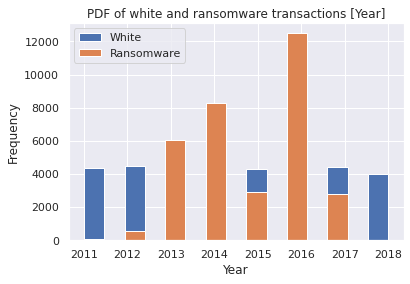

In [ ]:
#checking to see if the year in which the transaction has been made has any correlation with the transaction

undersampled_df['year'].plot(kind = 'hist', bins=15, label='White')
positive_df['year'].plot(kind = 'hist', bins=15, label='Ransomware')
plt.xlabel('year')
plt.title('PDF of white and ransomware transactions [Year]')
plt.xlabel('Year')
plt.legend()
plt.show()


Transactions made in 2011, 2012 and 2018 are far more likely to be white rather than ransomware

## Day
*   Feature indicates the day number of the year on which the transaction took place.
*   Now let us look at its distribution and how it affects the target variable.

**PDF of white vs ransomware**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


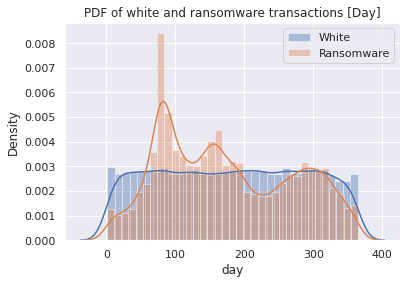

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['day'], label = 'White')
sns.distplot(positive_df['day'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [Day]')
plt.show()

## Length
*   Feature indicates the mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.
*   Now let us look at its distribution and how it affects the target variable.

**PDF of white vs ransomware**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


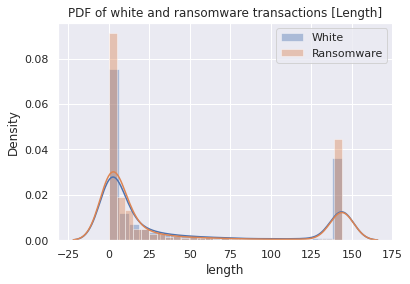

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['length'], label = 'White')
sns.distplot(positive_df['length'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [Length]')
plt.show()

The distributions look almost indistinguishable

## Weight
*   Feature indicates the merge behavior
*   Now let us look at its distribution and how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


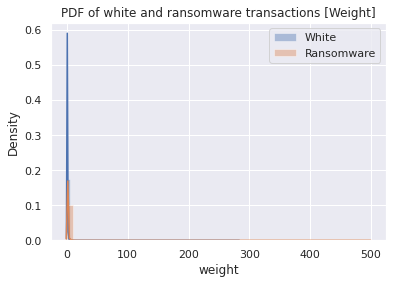

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['weight'], label = 'White')
sns.distplot(positive_df['weight'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [Weight]')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


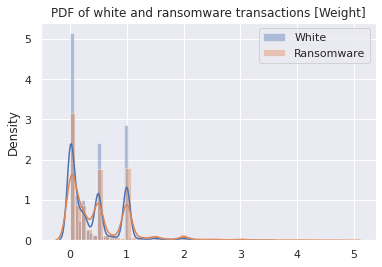

In [ ]:
#printing PDF for 99th percentile to zoom in further

sns.distplot([i for i in undersampled_df['weight'] if i < np.percentile(undersampled_df['weight'], 99)], label = 'White')
sns.distplot([i for i in positive_df['weight'] if i < np.percentile(positive_df['weight'], 99)], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [Weight]')
plt.show()

It seems like probability of a transction being ransomware is higher when at higher densities at peeks in the PDF of weight

## Count
*  Feature indicates the merging pattern.
*  Now let us look at its distribution and how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


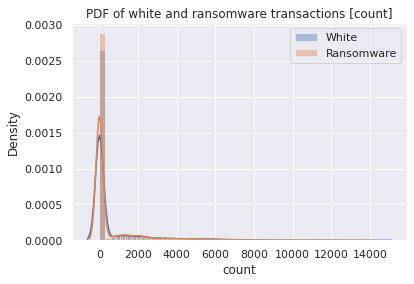

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['count'], label = 'White')
sns.distplot(positive_df['count'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [count]')
plt.show()

We notice very little separability between the two-classes

## Looped
*   Feature indicates how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address.
*   Now let us look at its distribution and how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


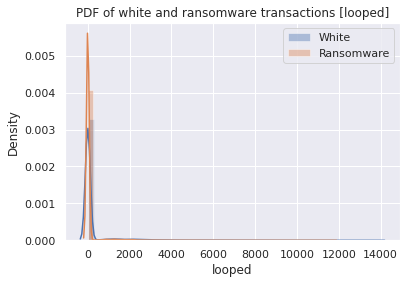

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['looped'], label = 'White')
sns.distplot(positive_df['looped'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [looped]')
plt.show()


We notice quite a lot of separability when the value of looped is around '0'. However, above 500, there appears to be no separability.

## Neighbors
*   Feature indicates number of neighbours a transaction had.
*   Now let us look at its distribution and how it affects the target variable.

[]

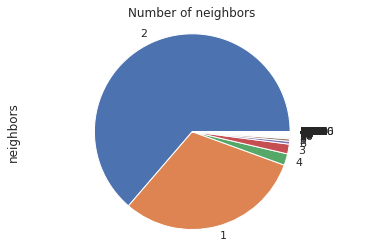

In [ ]:
X_train.neighbors.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of neighbors')
plt.plot()

It seems that most data-points have 2 neighbors

[]

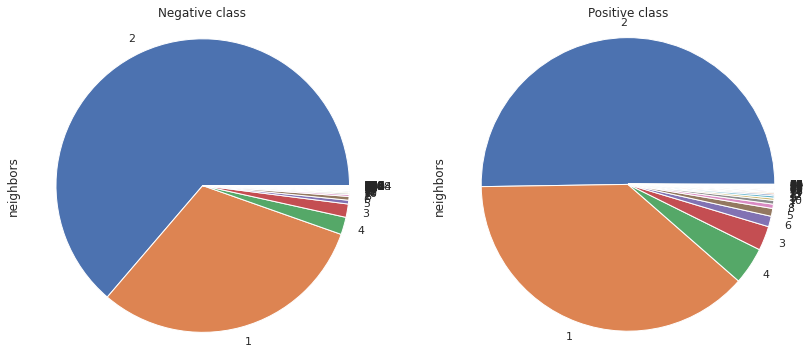

In [ ]:
plt.figure(figsize=(14, 6))

#plotting piechart of negative class
plt.subplot(121)
undersampled_df.neighbors.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Negative class')
plt.plot()


plt.subplot(122)
positive_df.neighbors.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Positive class')
plt.plot()

It's clear that both positive classes and negative classes follow considerably different distributions

## Income
*   Let us see how the income generated changes with the target variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


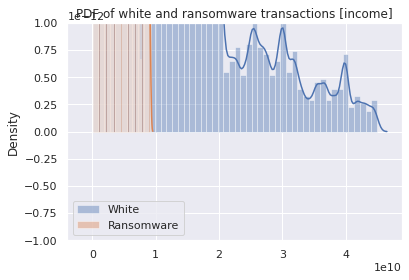

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(np.array([i for i in undersampled_df['income'] if i < np.percentile(undersampled_df.income, 99)]), label = 'White')
sns.distplot(np.array([i for i in positive_df['income'] if i < np.percentile(positive_df.income, 99)]), label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [income]')
plt.show()

It's evident that ransomware transactions usually contain a higher amount of income

## Gaussian Income
*   Feature corrects for the skewness in Income feature. Let us see how it changes with the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


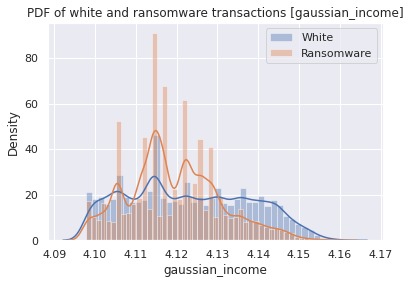

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['gaussian_income'], label = 'White')
sns.distplot(positive_df['gaussian_income'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [gaussian_income]')
plt.show()

There is a considerable amount of difference in both the distributions

## Gaussian neighbors
*   Feature corrects for skewness in neighhbors feature. Let us see how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


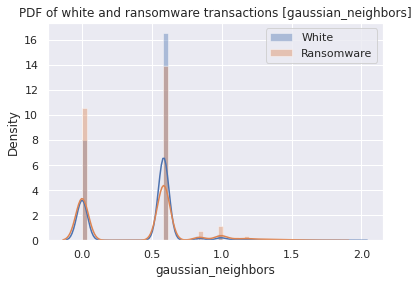

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['gaussian_neighbors'], label = 'White')
sns.distplot(positive_df['gaussian_neighbors'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [gaussian_neighbors]')
plt.show()

The PDF's have a little difference around the 0.5-0.7 mark

## Gaussian weight
*   Feature corrects for skewness in weight feature. Let us see how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


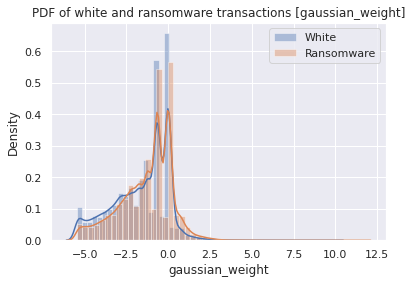

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['gaussian_weight'], label = 'White')
sns.distplot(positive_df['gaussian_weight'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [gaussian_weight]')
plt.show()

We notice a slight amount of separability between the two classes

## Gaussian length
*   Feature corrects for skewness in length feature. Let us see how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


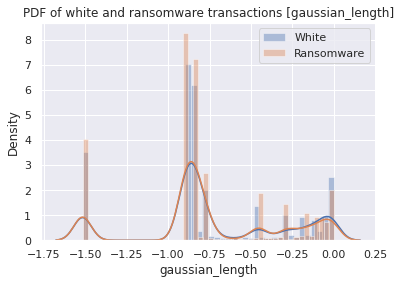

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['gaussian_length'], label = 'White')
sns.distplot(positive_df['gaussian_length'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [gaussian_length]')
plt.show()

The PDFs look almost identical, thereby indicating no amount of separability.

## Log count
*    Feature corrects for skewness in count feature. Let us see how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


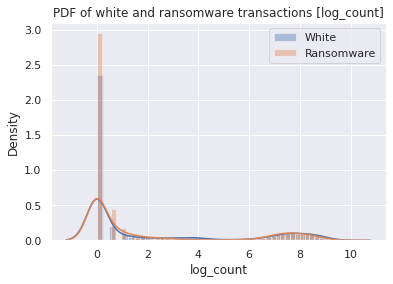

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['log_count'], label = 'White')
sns.distplot(positive_df['log_count'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [log_count]')
plt.show()

## Sigmoid looped
*   Feature corrects for skewness in looped feature. Let us see how it affects the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


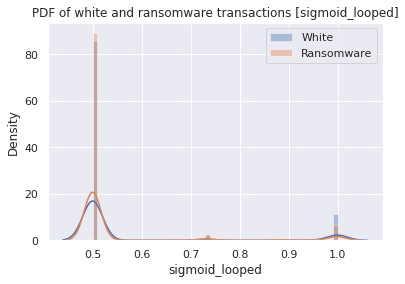

In [ ]:
#plotting pdfs of white and ransomware

sns.distplot(undersampled_df['sigmoid_looped'], label = 'White')
sns.distplot(positive_df['sigmoid_looped'], label = 'Ransomware')
plt.legend()
plt.title('PDF of white and ransomware transactions [sigmoid_looped]')
plt.show()

We see that this engineered feature gives us some amount of separability when the value is between 0.4 and 0.6

# **Target variable**
*   This is the variable we wish to predict. Let us see how it is distributed

	 Distribution of target variable


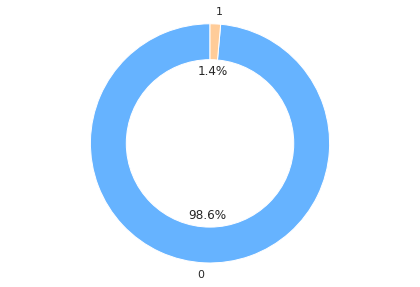

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


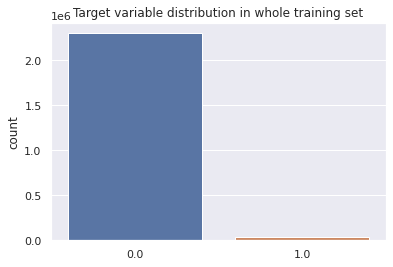

In [ ]:
#code to print pie chart

print('\t Distribution of target variable')
labels = [0, 1]
sizes = [pd.Series(y_train).value_counts()[0], pd.Series(y_train).value_counts()[1]]
explode = (0, 0.1)
colors = ['#66b3ff','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
#count plot

sns.set_theme(style='darkgrid')
sns.countplot(y_train)
plt.title('Target variable distribution in whole training set')
plt.show()

## Correlations
Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (e.g., height, weight).

In [ ]:
X_train.corr()

,year,day,length,weight,count,looped,neighbors,income,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped
year,1.000000,-4.031641e-02,0.163223,0.011742,0.285714,0.113152,-0.001148,-0.021044,-0.210614,-0.282398,7.791433e-02,0.115092,-0.067485,0.148971,0.025569
day,-0.040316,1.000000e+00,0.011836,0.000928,-0.002269,0.002954,0.000185,0.002973,-0.010892,-0.022637,-4.668905e-08,-0.008053,-0.004481,0.009084,-0.003534
length,0.163223,1.183619e-02,1.000000,0.000665,0.703332,0.411354,0.031472,0.000539,-0.094337,-0.016200,2.325419e-01,-0.355183,0.020971,0.902035,0.471085
weight,0.011742,9.282071e-04,0.000665,1.000000,0.023062,0.062714,0.680173,0.072098,0.047539,0.054831,1.040039e-01,0.224289,-0.030779,0.015996,0.055089
count,0.285714,-2.268535e-03,0.703332,0.023062,1.000000,0.559790,0.025378,-0.003888,-0.056523,-0.052038,1.227266e-01,-0.119160,-0.105780,0.797897,0.376559
looped,0.113152,2.954478e-03,0.411354,0.062714,0.559790,1.000000,0.052801,0.002275,-0.010365,0.020773,1.764372e-01,-0.074745,-0.064379,0.459501,0.664493
neighbors,-0.001148,1.854476e-04,0.031472,0.680173,0.025378,0.052801,1.000000,0.139024,0.046871,0.050426,1.344037e-01,0.089653,-0.004957,0.035469,0.070104
income,-0.021044,2.973484e-03,0.000539,0.072098,-0.003888,0.002275,0.139024,1.000000,0.000658,0.058291,1.749479e-02,0.001099,0.006540,-0.004129,0.003340
n_address,-0.210614,-1.089163e-02,-0.094337,0.047539,-0.056523,-0.010365,0.046871,0.000658,1.000000,-0.019095,-7.014451e-02,-0.002000,-0.068349,-0.017225,0.028223
gaussian_income,-0.282398,-2.263680e-02,-0.016200,0.054831,-0.052038,0.020773,0.050426,0.058291,-0.019095,1.000000,1.688088e-01,0.018608,0.107733,-0.048287,0.029484


## Correlation map
Correlation map shows how correlated sets of features are. Darker the color in the box, higher is the correlation between the corresponding features

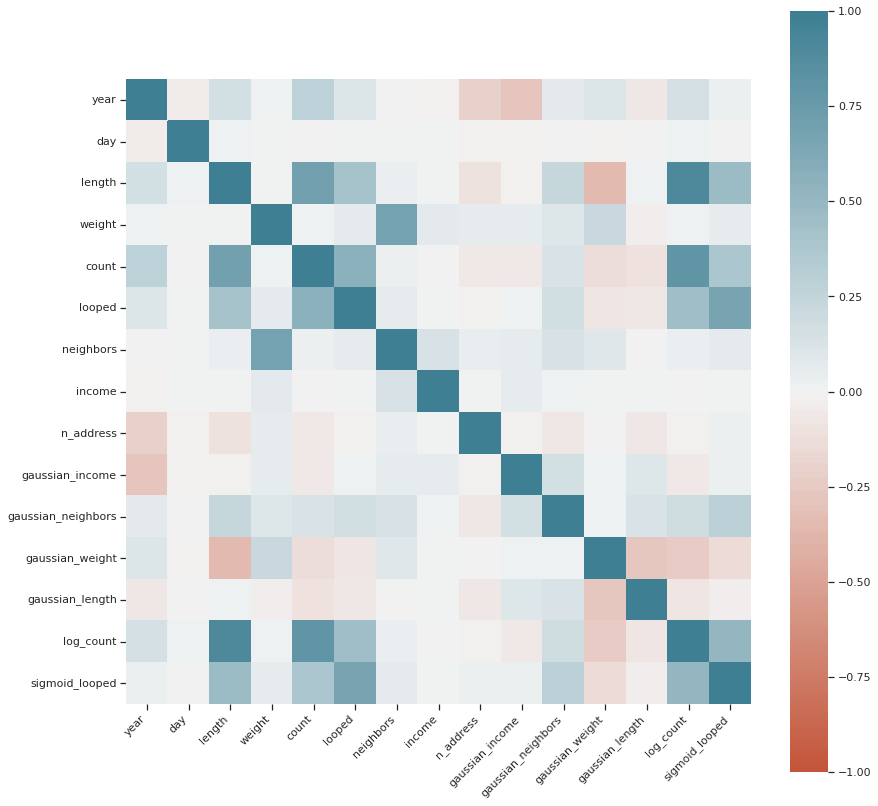

In [ ]:
#plotting correlation map
# +1 and -1 mean fully-correlated features

corr = X_train.corr()
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# **Modelling**

*Key Performance Indicator : Recall*

*   Recall tells us of all the data-points in the data-set that are actually positive, what percentage of them have we predicted to be positive.
*   We want to correctly classify as many positive data-points (ransomware transactions) as possible even if it means we incorreclty classify a few white transactions to be of type ransomware also. A domain expert can validate our results and filter out the false positives. We want maximum recall.

Other metrics:
*   Log-loss: A loss function that has no specific range. Lower is better.
*   Precision: Tells us what percentage of data-points that we classified as *   positive, are infact positive. Higher is better.
*   ROCAUC: Uses True Positive Rate and False Positive Rate to get area under the curve. Higher is better.
*   F1-Score: Harmonic mean of precision and recall. Higher is better.
Accuracy: Tells us how accurate our predictions are. Higher is better

In [ ]:
#taking a sub-df of all the positive class datapoints for comparison

temp_df = pd.DataFrame(X_train_distance)

positive_df = pd.DataFrame([], columns = temp_df.columns)
negative_df = pd.DataFrame([], columns = temp_df.columns)
index = 0

for index_df, row in tqdm(temp_df.iterrows(), total=temp_df.shape[0]):
    if y_train[index] == 0:
        if np.random.uniform(0, 1) < 0.015:
            #picking negative class with a probability of 1.5%
            
            #Why 1.5%?
            #Because only 1.5% of our data-points in the original data
            #belong to positive class and hence we want to get same 
            #number of negative data points
            
            negative_df = negative_df.append(row, ignore_index=True)
            index += 1
        else:
            index += 1

    elif y_train[index] == 1:
        #picking all positive data-points
        positive_df = positive_df.append(row, ignore_index=True)
        index += 1

  0%|          | 0/2333357 [00:00<?, ?it/s]

In [ ]:
combined_df = positive_df.append(negative_df, ignore_index = True)
combined_labels = np.append([1] * positive_df.shape[0], [0] * negative_df.shape[0])

In [ ]:
combined_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.096544,-1.225571,-0.763299,0.120584,-0.426614,-0.246761,-0.011472,-0.027096,2.671250,-0.232848,0.490384,0.957325,-0.407699,-0.685938,-0.395178
1,0.675443,0.360724,1.677657,-0.078485,0.610045,-0.246761,-0.011472,-0.027541,-0.374357,-0.702006,0.490384,0.224781,-0.269160,1.626744,-0.395178
2,-0.653547,1.004857,1.101320,0.079377,-0.410648,-0.246761,-0.011472,-0.027837,2.671250,-1.439692,0.490384,0.857755,0.257193,0.345747,-0.395178
3,0.675443,0.927945,1.677657,-0.132340,0.592304,-0.246761,-0.011472,-0.027318,-0.374357,-0.423330,0.490384,-0.432821,-0.269160,1.621403,-0.395178
4,0.675443,-0.687192,-0.763299,-0.012475,-0.426614,-0.246761,-0.011472,-0.027286,-0.374357,-0.391837,0.490384,0.566008,-0.407699,-0.685938,-0.395178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67450,0.675443,-0.273794,-0.763299,-0.012475,-0.426614,-0.246761,-0.011472,-0.027613,-0.374357,-0.823911,0.490384,0.566008,-0.407699,-0.685938,-0.395178
67451,1.561436,-1.523602,0.321570,-0.145534,-0.426614,-0.245727,0.268507,0.080179,-0.374357,1.797095,2.578585,-2.125544,1.058624,-0.685938,1.031950
67452,0.675443,-1.052521,-0.017452,-0.012475,-0.426614,-0.246761,-0.011472,-0.025941,-0.374357,0.278501,0.490384,0.566008,1.415879,-0.685938,-0.395178
67453,0.232446,-1.590900,-0.458180,-0.136649,-0.425432,-0.246761,-0.011472,-0.026800,-0.374357,-0.048756,0.490384,-0.565379,1.617066,-0.345796,-0.395178


## Modelling - Random model
*Why?*
*   **To have a baseline. Some of the metrics we use (such as log-loss) do not have a specific range. We can use the output of a random model as the worst case**

In [ ]:
class RandomModel():
    '''
    This class predicts class labels randomly and is meant
    to be used as a baseline for metrics that don't have a specific range
    like log-loss.
    '''
    
    def predict(self, X):
        #predict class labels randomly
        
        y_pred = np.array([])
        for data_point in tqdm(range(X.shape[0])):
            if np.random.uniform(0, 1) >= 0.5:
                y_pred = np.append(y_pred, 1)
            else:
                y_pred = np.append(y_pred, 0)
        return y_pred

In [ ]:
random_model = RandomModel()
random_pred = random_model.predict(X_test_distance)

  0%|          | 0/583340 [00:00<?, ?it/s]

In [ ]:
#displaying the table

random_table = PrettyTable()
random_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  'Log-loss'
                 ]

#random_pred = random_model.predict(X_test_distance)

random_table.add_row([
    'Random Model',
    accuracy_score(y_true = y_test, y_pred = random_pred),
    f1_score(y_true = y_test, y_pred = random_pred),
    precision_score(y_true = y_test, y_pred = random_pred),
    recall_score(y_true = y_test, y_pred = random_pred),
    log_loss(y_true = y_test, y_pred = random_pred)
])

print(random_table)

+--------------+---------------------+----------------------+----------------------+--------------------+--------------------+
|  Model Name  |       Accuracy      |       F1-Score       |      Precision       |       Recall       |      Log-loss      |
+--------------+---------------------+----------------------+----------------------+--------------------+--------------------+
| Random Model | 0.49929543662358145 | 0.028207440136545567 | 0.014503414580738753 | 0.5117710974284679 | 17.294117773248715 |
+--------------+---------------------+----------------------+----------------------+--------------------+--------------------+


In [ ]:
#Building a smaller balanced data-set for hyper-paramter tuning

combined_X_train, combined_X_test, combined_y_train, combined_y_test = train_test_split(
    combined_df,
    combined_labels,
    test_size = 0.2,
    shuffle = True,
    random_state = 42
)

**Helper method**

In [ ]:
#method to print better looking plots

def pretty_importances_plot(importances, feature_name, fig_size = (10, 7), xlabel = '', ylabel = '', horizontal_label = None, n_elements=None):
    '''
    This function plots a better looking importances-plot
    
    importances: Occurences of feature_name
    feature_name: unique feature_name
    fig_size: size of plot
    xlabel: xlabel
    ylabel: ylabel
    horizontal_label: Bigger label at the top-left
    n_elements: number of elements to display
    '''
    
    # This code has been borrowed from:
    # https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html
    # Credits to SIMONE CENTELLEGHER
    # set the style of the axes and the text color
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    plt.rcParams['text.color']='#333F4B'

    # percentages = pd.Series(data= list(map(operator.itemgetter(1), word_importances_title_entity)),
    #                       index = list(map(operator.itemgetter(0), word_importances_title_entity)))
    
    
    if not n_elements:
        n_elements = len(importances)
    
    percentages = pd.Series(
        data = importances[:n_elements],
        index = feature_name[:n_elements]
    )

    df = pd.DataFrame({'percentage' : percentages})
    df = df.sort_values(by='percentage')

    # we first need a numeric placeholder for the y axis
    my_range=list(range(1,len(df.index)+1))

    #fig, ax = plt.subplots(figsize=(5,3.5)) ######################
    fig, ax = plt.subplots(figsize=fig_size)
    
    # create for each expense type an horizontal line that starts at x = 0 with the length 
    # represented by the specific expense percentage value.
    plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

    # create for each expense type a dot at the level of the expense percentage value
    plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

    # set labels
    ax.set_xlabel(xlabel, fontsize=15, fontweight='black', color = '#333F4B')
    ax.set_ylabel(ylabel)

    # set axis
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks(my_range, df.index)

    # add an horizonal label for the y axis
    if horizontal_label:
        fig.text(-0.23, 0.96, horizontal_label, fontsize=15, fontweight='black', color = '#333F4B')

    # change the style of the axis spines
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)

    # set the spines position
    ax.spines['bottom'].set_position(('axes', -0.04))
    ax.spines['left'].set_position(('axes', 0.015))

## Distance Based Models

**Distance-based models are based on the geometry of data. As the name implies, distance-based models work on the concept of distance.**

### Logistic Regression 

*   Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.



In [ ]:
#getting sgd classifier to perfrom hyper-paramter tuning
from sklearn.linear_model import SGDClassifier

lr_sgd = SGDClassifier(
    loss = 'log',
    penalty = 'elasticnet',
    n_jobs = -1,
    random_state = 42,
    class_weight = 'balanced'
)

lr_sgd.fit(combined_X_train, combined_y_train)

SGDClassifier(class_weight='balanced', loss='log', n_jobs=-1,
              penalty='elasticnet', random_state=42)

In [ ]:
#hyper-paramter tuning

lr_hyperparam = RandomizedSearchCV(
    estimator = lr_sgd,
    param_distributions = {
        'alpha' : [0.001, 0.01, 0.1, 1.0, 10]
    },
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1,
    random_state = 42,
    return_train_score = True,
    n_iter = 25
)

lr_hyperparam.fit(combined_X_train, combined_y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=25. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=SGDClassifier(class_weight='balanced', loss='log',
                                           n_jobs=-1, penalty='elasticnet',
                                           random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1.0, 10]},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=1)

In [ ]:
#best alpha is 0.001

lr_hyperparam.best_params_

{'alpha': 0.001}

In [ ]:
lr_full = SGDClassifier(
    alpha = 0.001,
    loss = 'log',
    penalty = 'elasticnet',
    n_jobs = -1,
    random_state = 42,
    class_weight = 'balanced'
)

lr_full.fit(X_train_distance, y_train)

SGDClassifier(alpha=0.001, class_weight='balanced', loss='log', n_jobs=-1,
              penalty='elasticnet', random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


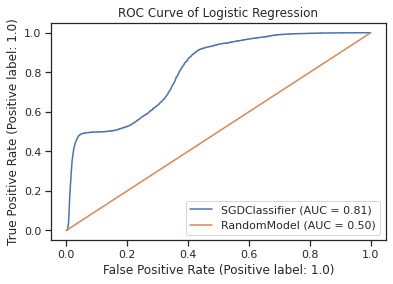

In [ ]:
plot_roc_curve(
    lr_full,
    X_test_distance,
    y_test
)
plt.title('ROC Curve of Logistic Regression')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='RandomModel (AUC = 0.50)')
plt.legend()
plt.show()

In [ ]:
lr_table = PrettyTable()
lr_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  'Log-loss'
                 ]

lr_preds = lr_full.predict(X_test_distance)

lr_table.add_row([
    'Logistic Regression',
    accuracy_score(y_true = y_test, y_pred = lr_preds),
    f1_score(y_true = y_test, y_pred = lr_preds),
    precision_score(y_true = y_test, y_pred = lr_preds),
    recall_score(y_true = y_test, y_pred = lr_preds),
    log_loss(y_true = y_test, y_pred = lr_preds)
])

print(lr_table)

+---------------------+-------------------+---------------------+---------------------+--------------------+--------------------+
|      Model Name     |      Accuracy     |       F1-Score      |      Precision      |       Recall       |      Log-loss      |
+---------------------+-------------------+---------------------+---------------------+--------------------+--------------------+
| Logistic Regression | 0.858185620735763 | 0.09124263995078653 | 0.05018791767876349 | 0.5013883858505372 | 4.8982028683186565 |
+---------------------+-------------------+---------------------+---------------------+--------------------+--------------------+


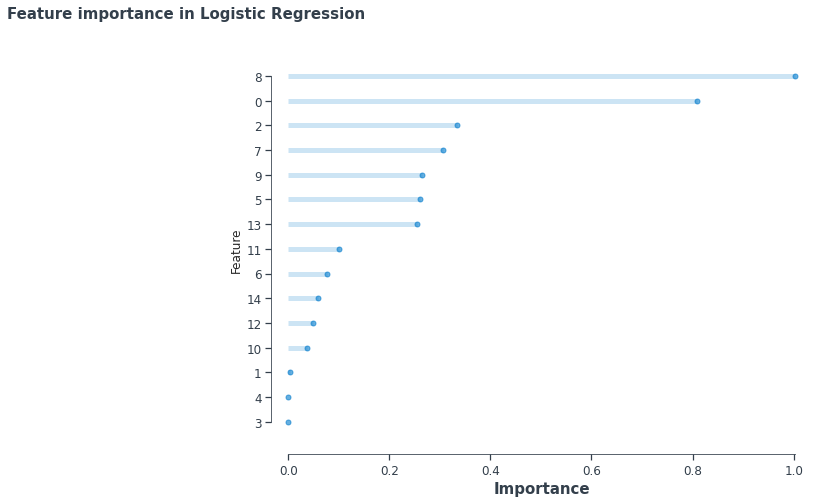

In [ ]:
#Feauture importance tells us what the role each feature plays in predicting the target variable

pretty_importances_plot(
    np.abs(lr_full.coef_[0]), 
    [i for i in range(X_train_distance.shape[1])],
    xlabel = 'Importance',
    ylabel = 'Feature',
    horizontal_label = 'Feature importance in Logistic Regression'
)

### Support vector machines

**Support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible.**

In [ ]:
from sklearn.svm import SVC

#Hyper-paramter tuning
svc_hyperparams = RandomizedSearchCV(
    estimator = SVC(),
    param_distributions = {
        'C' : [0.001, 0.01, 0.1, 1.0, 10]
    },
    scoring = 'f1',
    n_jobs = -1,
    verbose = 5,
    random_state = 42,
    return_train_score = True,
    n_iter = 10
)

svc_hyperparams.fit(combined_X_train, combined_y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10]},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=5)

In [ ]:
#best hyper-parameter
svc_hyperparams.best_params_

{'C': 10}

In [ ]:
#fitting the model

svc_model = SGDClassifier(
    loss = 'hinge',
    n_jobs = -1,
    alpha = 0.1, # alpha = 1/C and our best C = 10
    penalty = 'elasticnet',
    random_state = 42,
    class_weight = 'balanced'
).fit(X_train_distance, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


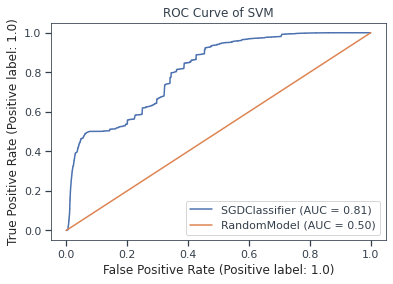

In [ ]:
#Plotting ROC curve

plot_roc_curve(
    svc_model,
    X_test_distance,
    y_test
)
plt.title('ROC Curve of SVM')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='RandomModel (AUC = 0.50)')
plt.legend()
plt.show()

In [ ]:
svc_table = PrettyTable()
svc_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  'Log-loss'
                 ]

svc_preds = svc_model.predict(X_test_distance)

svc_table.add_row([
    'SVM',
    accuracy_score(y_true = y_test, y_pred = svc_preds),
    f1_score(y_true = y_test, y_pred = svc_preds),
    precision_score(y_true = y_test, y_pred = svc_preds),
    recall_score(y_true = y_test, y_pred = svc_preds),
    log_loss(y_true = y_test, y_pred = svc_preds)
])

print(svc_table)

+------------+--------------------+--------------------+---------------------+--------------------+--------------------+
| Model Name |      Accuracy      |      F1-Score      |      Precision      |       Recall       |      Log-loss      |
+------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|    SVM     | 0.9139061267871225 | 0.1418856576564262 | 0.08263837748542086 | 0.5012676566461427 | 2.9736402138553144 |
+------------+--------------------+--------------------+---------------------+--------------------+--------------------+


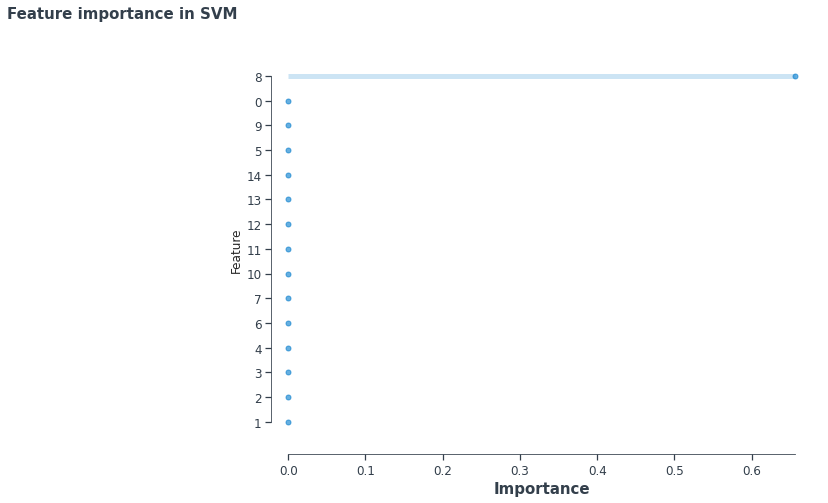

In [ ]:
pretty_importances_plot(
    np.abs(svc_model.coef_[0]), 
    [i for i in range(X_train_distance.shape[1])],
    xlabel = 'Importance',
    ylabel = 'Feature',
    horizontal_label = 'Feature importance in SVM'
)

## Tree Based Models

Tree based models are a family of classifiers which form a tree with each attribute at one level and which perform series of condition checking with one attribute at a time

In [ ]:
#taking a sub-df of all the positive class datapoints for comparison

temp_df = pd.DataFrame(X_train_tree)

positive_df_tree = pd.DataFrame([], columns = temp_df.columns)
negative_df_tree = pd.DataFrame([], columns = temp_df.columns)
index = 0

for index_df, row in tqdm(temp_df.iterrows(), total=temp_df.shape[0]):
    if y_train[index] == 0:
        if np.random.uniform(0, 1) < 0.015:
            #picking negative class with a probability of 1.5%
            negative_df_tree = negative_df_tree.append(row, ignore_index=True)
            index += 1
        else:
            index += 1

    elif y_train[index] == 1:
        #picking all positive data-points
        positive_df_tree = positive_df_tree.append(row, ignore_index=True)
        index += 1 


  0%|          | 0/2333357 [00:00<?, ?it/s]

In [ ]:
combined_X_tree = positive_df_tree.append(negative_df_tree)
combined_y_tree = np.append([1] * positive_df_tree.shape[0], [0] * negative_df_tree.shape[0])

In [ ]:
combined_X_tree.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2012.0,54.0,0.0,1.000000,1.0,0.0,2.0,155000000.0,0.038124,4.119435,0.584169,0.000000,-0.895193,9.999995e-07,0.5
1,2016.0,219.0,144.0,0.251953,1754.0,0.0,2.0,84620000.0,0.000000,4.112403,0.584169,-1.218924,-0.835022,7.469654e+00,0.5
2,2013.0,286.0,110.0,0.845155,28.0,0.0,2.0,37905000.0,0.038124,4.101345,0.584169,-0.165682,-0.606411,3.332205e+00,0.5
3,2016.0,278.0,144.0,0.049580,1724.0,0.0,2.0,119940000.0,0.000000,4.116580,0.584169,-2.313147,-0.835022,7.452402e+00,0.5
4,2016.0,110.0,0.0,0.500000,1.0,0.0,2.0,125000000.0,0.000000,4.117052,0.584169,-0.651137,-0.895193,9.999995e-07,0.5


In [ ]:
combined_y_tree

array([1, 1, 1, ..., 0, 0, 0])

### Random forest

**"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." *Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output*.**

*The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_hyperparam = RandomizedSearchCV(
    estimator = RandomForestClassifier(
        n_jobs = -1,
        random_state = 42,
        class_weight = 'balanced'
    ),
    param_distributions = {
        'n_estimators' : [100, 500, 1000],
    },
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1,
    random_state = 42,
    return_train_score = True,
    n_iter = 25
).fit(combined_X_train, combined_y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=25. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
random_forest_hyperparam.best_params_

{'n_estimators': 1000}

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators = 500,
    class_weight = 'balanced',
    random_state = 42,
    n_jobs = -1
).fit(X_train_tree, y_train)

In [ ]:
rf_preds = rf_clf.predict(X_test_tree)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


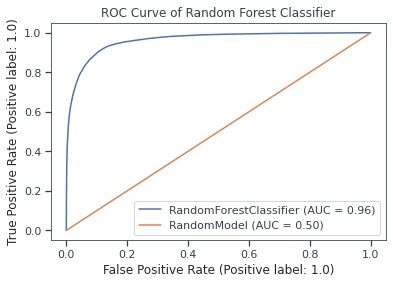

In [ ]:
#Plotting ROC curve

plot_roc_curve(
    rf_clf,
    X_test_tree,
    y_test
)
plt.title('ROC Curve of Random Forest Classifier')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='RandomModel (AUC = 0.50)')
plt.legend()
plt.show()

In [ ]:
rf_table = PrettyTable()
rf_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  'Log-loss'
                 ]

rf_preds = rf_clf.predict(X_test_tree)

rf_table.add_row([
    'Random Forest',
    accuracy_score(y_true = y_test, y_pred = rf_preds),
    f1_score(y_true = y_test, y_pred = rf_preds),
    precision_score(y_true = y_test, y_pred = rf_preds),
    recall_score(y_true = y_test, y_pred = rf_preds),
    log_loss(y_true = y_test, y_pred = rf_preds)
])

print(rf_table)


+---------------+--------------------+----------------------+--------------------+----------------------+---------------------+
|   Model Name  |      Accuracy      |       F1-Score       |     Precision      |        Recall        |       Log-loss      |
+---------------+--------------------+----------------------+--------------------+----------------------+---------------------+
| Random Forest | 0.9858333047622313 | 0.006013952369497233 | 0.8064516129032258 | 0.003018230109863576 | 0.48930032729647727 |
+---------------+--------------------+----------------------+--------------------+----------------------+---------------------+


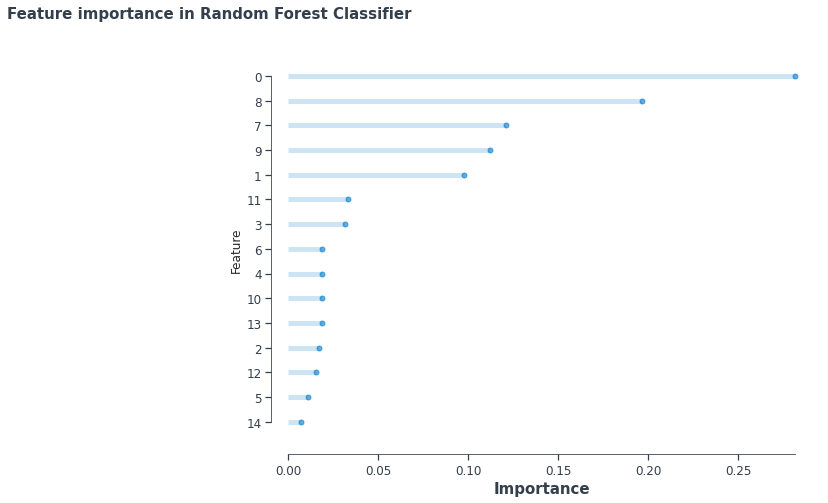

In [ ]:
#displaying feature importances

pretty_importances_plot(
    rf_clf.feature_importances_, 
    [i for i in range(X_train_tree.shape[1])],
    xlabel = 'Importance',
    ylabel = 'Feature',
    horizontal_label = 'Feature importance in Random Forest Classifier'
)

### Gradient boosted descision tree

**In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the fascinating idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor**

In [ ]:
from xgboost import XGBClassifier
from collections import Counter

#we use counter to get an esimator as to how much 
#weight should be given to positive class

#why? because only 1.5% of our data-set contains positive datapoints

counter = Counter(y_train)
estimate = counter[0] / counter[1]

gbdt_clf = XGBClassifier(
    n_estimators = 500,
    max_depth = 2,
    verbosity = 1,
    n_jobs = -1,
    random_state = 42,
    scale_pos_weight = estimate
).fit(X_train_tree, y_train, verbose=1)

In [ ]:
#hyper-paramter turning

gbdt_hyperparam = RandomizedSearchCV(
    estimator = XGBClassifier(
            max_depth = 2,
            verbosity = 1,
            n_jobs = -1,
            random_state = 42,
            scale_pos_weight = estimate
    ),
    param_distributions = [100, 500, 1000, 2000],
    n_jobs = -1,
    verbose = 3,
    random_state = 42
)

In [ ]:
gbdt_pred = gbdt_clf.predict(X_test_tree)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


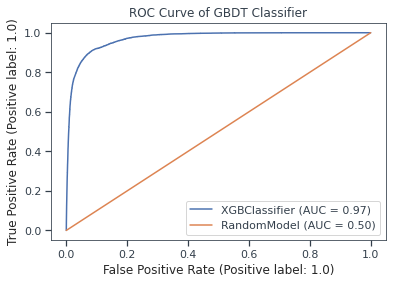

In [ ]:
#Plotting ROC curve

plot_roc_curve(
    gbdt_clf,
    X_test_tree,
    y_test
)
plt.title('ROC Curve of GBDT Classifier')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='RandomModel (AUC = 0.50)')
plt.legend()
plt.show()

In [ ]:
gbdt_table = PrettyTable()
gbdt_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  'Log-loss'
                 ]

gbdt_pred = gbdt_clf.predict(X_test_tree)

gbdt_table.add_row([
    'GBDT',
    accuracy_score(y_true = y_test, y_pred = gbdt_pred),
    f1_score(y_true = y_test, y_pred = gbdt_pred),
    precision_score(y_true = y_test, y_pred = gbdt_pred),
    recall_score(y_true = y_test, y_pred = gbdt_pred),
    log_loss(y_true = y_test, y_pred = gbdt_pred)
])

print(gbdt_table)

+------------+--------------------+---------------------+-----------+--------------------+--------------------+
| Model Name |      Accuracy      |       F1-Score      | Precision |       Recall       |      Log-loss      |
+------------+--------------------+---------------------+-----------+--------------------+--------------------+
|    GBDT    | 0.9077844824630575 | 0.21997302901555904 |   0.125   | 0.9157310153326089 | 3.1850839188757623 |
+------------+--------------------+---------------------+-----------+--------------------+--------------------+


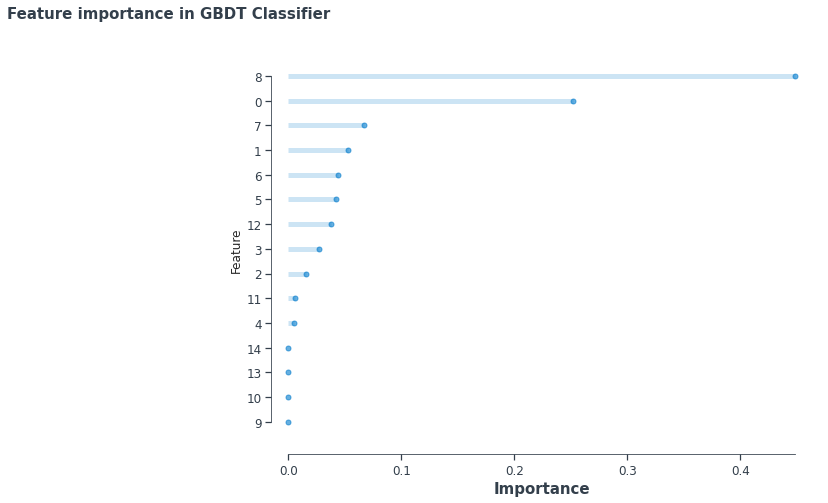

In [ ]:
#feature importances

pretty_importances_plot(
    gbdt_clf.feature_importances_, 
    [i for i in range(X_train_tree.shape[1])],
    xlabel = 'Importance',
    ylabel = 'Feature',
    horizontal_label = 'Feature importance in GBDT Classifier'
)

### Combined results of the models used

In [ ]:
final_table = PrettyTable()
final_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  'Log-loss'
                 ]

final_table.add_row([
    'Logistic Regression',
    accuracy_score(y_true = y_test, y_pred = lr_preds),
    f1_score(y_true = y_test, y_pred = lr_preds),
    precision_score(y_true = y_test, y_pred = lr_preds),
    recall_score(y_true = y_test, y_pred = lr_preds),
    log_loss(y_true = y_test, y_pred = lr_preds)
])

final_table.add_row([
    'SVM',
    accuracy_score(y_true = y_test, y_pred = svc_preds),
    f1_score(y_true = y_test, y_pred = svc_preds),
    precision_score(y_true = y_test, y_pred = svc_preds),
    recall_score(y_true = y_test, y_pred = svc_preds),
    log_loss(y_true = y_test, y_pred = svc_preds)
])

final_table.add_row([
    'Random Forest',
    accuracy_score(y_true = y_test, y_pred = rf_preds),
    f1_score(y_true = y_test, y_pred = rf_preds),
    precision_score(y_true = y_test, y_pred = rf_preds),
    recall_score(y_true = y_test, y_pred = rf_preds),
    log_loss(y_true = y_test, y_pred = rf_preds)
])
final_table.add_row([
    'GBDT',
    accuracy_score(y_true = y_test, y_pred = gbdt_pred),
    f1_score(y_true = y_test, y_pred = gbdt_pred),
    precision_score(y_true = y_test, y_pred = gbdt_pred),
    recall_score(y_true = y_test, y_pred = gbdt_pred),
    log_loss(y_true = y_test, y_pred = gbdt_pred)
])
print(final_table)

+---------------------+--------------------+----------------------+---------------------+----------------------+---------------------+
|      Model Name     |      Accuracy      |       F1-Score       |      Precision      |        Recall        |       Log-loss      |
+---------------------+--------------------+----------------------+---------------------+----------------------+---------------------+
| Logistic Regression | 0.858185620735763  | 0.09124263995078653  | 0.05018791767876349 |  0.5013883858505372  |  4.8982028683186565 |
|         SVM         | 0.9139061267871225 |  0.1418856576564262  | 0.08263837748542086 |  0.5012676566461427  |  2.9736402138553144 |
|    Random Forest    | 0.9858333047622313 | 0.006013952369497233 |  0.8064516129032258 | 0.003018230109863576 | 0.48930032729647727 |
|         GBDT        | 0.9077844824630575 | 0.21997302901555904  |        0.125        |  0.9157310153326089  |  3.1850839188757623 |
+---------------------+--------------------+-----------

# **Model Summary**

Since our most important concern is to predict ransomware transactions and mis-classify positive class data-points as less as possible, we go with the model that gives us the best Recall.
Hence, we choose GBDT.

## Comparison with our initial copy of data made earlier at the start

To understand if our data-cleaning and feature engineering has helped get better performance from our models, we compare the results with our original unprocessed data.

In [ ]:
#Stock data
#X_train is not processed.

counter = Counter(y_train)
estimate = counter[0] / counter[1]

gbdt_dirty = XGBClassifier(
    n_estimators = 2000,
    max_depth = 2,
    verbosity = 1,
    n_jobs = 6,
    random_state = 42,
    scale_pos_weight = estimate
).fit(X_train_stock.drop(['address'], axis=1), y_train, verbose=1)

gbdt_dirty_preds = gbdt_dirty.predict(X_test_stock.drop(['address'], axis=1))

In [ ]:
#printing table

dirty_table = PrettyTable()

dirty_table.field_names = ['Model Name',
                  'Accuracy',
                  'F1-Score',
                  'Precision',
                  'Recall',
                  'Log-loss'
                 ]

dirty_table.add_row([
    'GBDT dirty',
    accuracy_score(y_true = y_test, y_pred = gbdt_dirty_preds),
    f1_score(y_true = y_test, y_pred = gbdt_dirty_preds),
    precision_score(y_true = y_test, y_pred = gbdt_dirty_preds),
    recall_score(y_true = y_test, y_pred = gbdt_dirty_preds),
    log_loss(y_true = y_test, y_pred = gbdt_dirty_preds)
])

gbdt_pred = gbdt_clf.predict(X_test_tree)

dirty_table.add_row([
    'GBDT clean',
    accuracy_score(y_true = y_test, y_pred = gbdt_pred),
    f1_score(y_true = y_test, y_pred = gbdt_pred),
    precision_score(y_true = y_test, y_pred = gbdt_pred),
    recall_score(y_true = y_test, y_pred = gbdt_pred),
    log_loss(y_true = y_test, y_pred = gbdt_pred)
])

print(dirty_table)


+------------+--------------------+---------------------+----------------------+--------------------+--------------------+
| Model Name |      Accuracy      |       F1-Score      |      Precision       |       Recall       |      Log-loss      |
+------------+--------------------+---------------------+----------------------+--------------------+--------------------+
| GBDT dirty | 0.8074450577707684 | 0.11579485968433896 | 0.061935798976017246 | 0.887963298321864  | 6.650764787796608  |
| GBDT clean | 0.9077844824630575 | 0.21997302901555904 |        0.125         | 0.9157310153326089 | 3.1850839188757623 |
+------------+--------------------+---------------------+----------------------+--------------------+--------------------+


*   Engineered features and cleansed data have indeed increased the performace of our model
*   There is a substantial increase all the metrics in our models.

## Conclusion



*   We got a data-set with extremely skewed features and normalized it by applying various transformations. We cleaned the data and performed uni-variate and bivariate analysis on it to figure out which features play the biggest role in predicting the dependent feature.
*   We decide our KPI (Key Performance Indicator) to be Recall.
*   We have applied various algorithms on the data from linear models and tree-based models.
*   We find out that GBDT perform the best on our data and was able to achieve the highest recall among all other models.




##  References



1.   Goldsmith, D., Grauer, K., & Shmalo, Y. (2020). Analyzing hack subnetworks in the bitcoin transaction graph. Applied Network Science, 5, 1-20.
2.   Rivera-Castro, R., Pilyugina, P., & Burnaev, E. (2019, November). Topological Data Analysis for Portfolio Management of Cryptocurrencies. In 2019 International Conference on Data Mining Workshops (ICDMW) (pp. 238-243), IEEE.

